In [2]:
import geopandas
import matplotlib.pyplot as plt
import momepy
import networkx as nx
from contextily import add_basemap
from libpysal import weights
from random import sample

c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
gf = geopandas.read_file("width.shp")
G = momepy.gdf_to_nx(gf, approach="primal")

In [4]:
print (len(list(G.nodes(data=True))),len(list(G.edges(data=True))))

17550 26230


In [5]:
poids = []
for v in list(G.edges(data=True)):
    poids.append((v[0],v[1],float(v[2]['width'])))
len(poids)

26230

In [7]:
G.add_weighted_edges_from(poids)

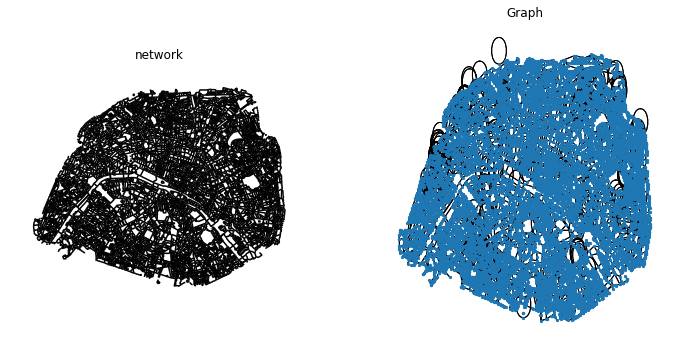

In [8]:
positions = {n: [n[0], n[1]] for n in list(G.nodes)}

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("network", "Graph")[i])
    facet.axis("off")
nx.draw(G, positions, ax=ax[1], node_size=5)

In [9]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
H = nx.DiGraph(G)
bc = nx.edge_betweenness_centrality(H,weight='weight')
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(((58424.849599951, 6251766.60147064), (59370.06161153, 6251299.69369019)),
 0.0826233652001502)

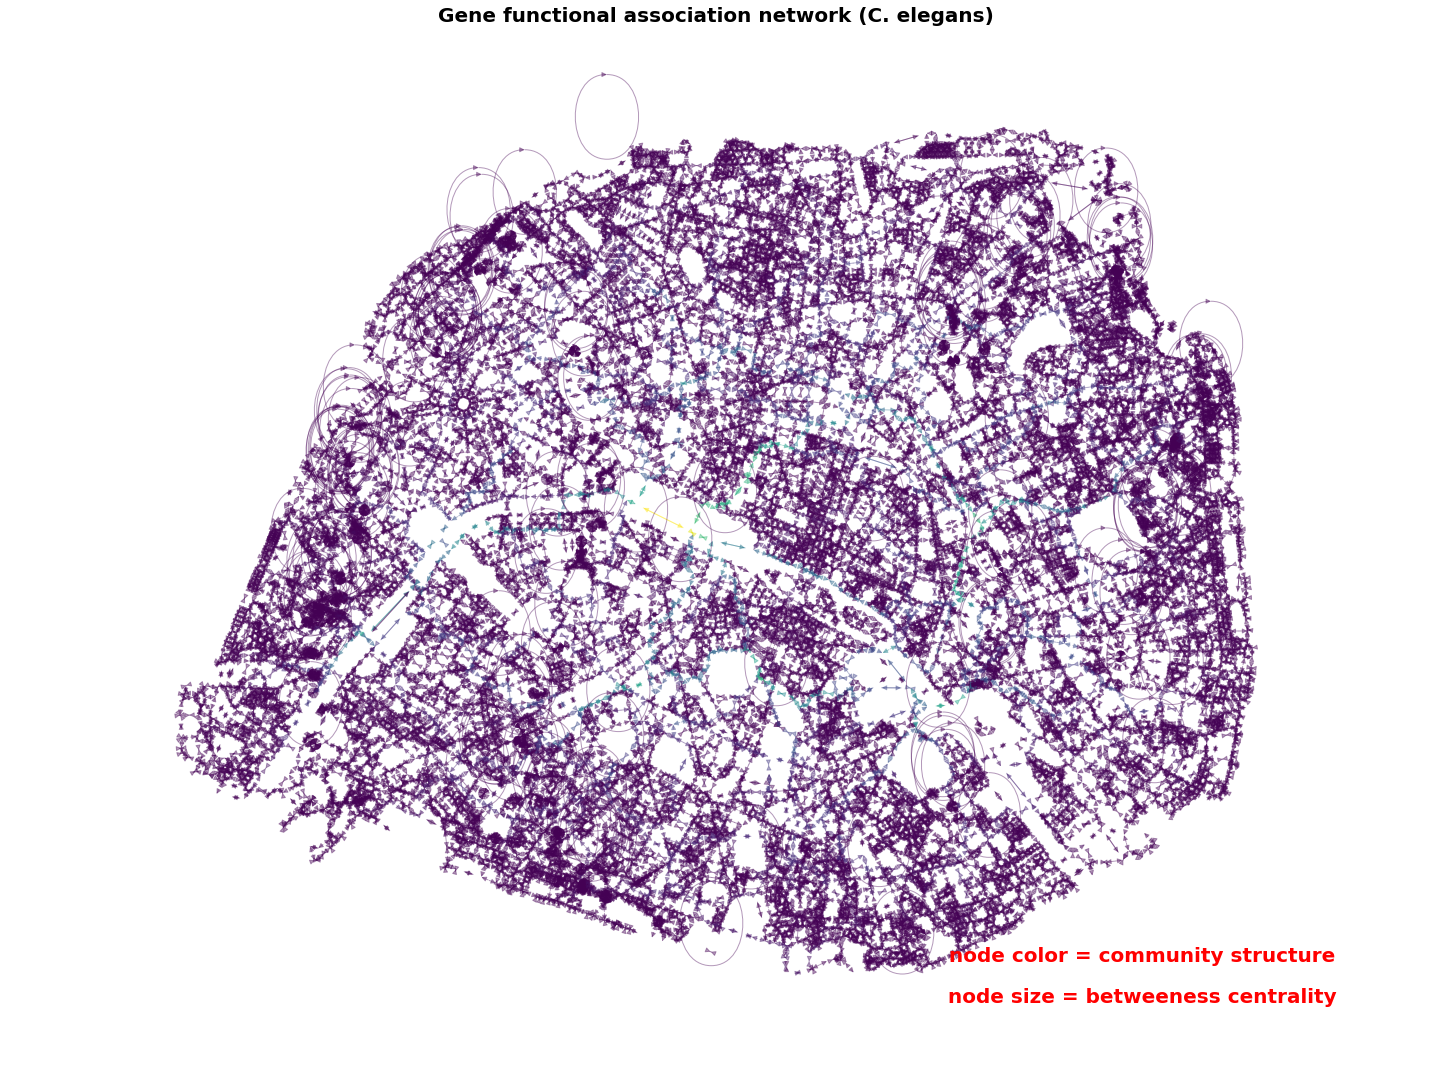

In [16]:
# compute centrality
centrality =bc 
#centrality = nx.betweenness_centrality(H, endpoints=True)
#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_networkx_edges(
    H,
    pos = {n: [n[0], n[1]] for n in list(G.nodes)},
    edge_color=[v * 200000 for v in centrality.values()],
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [12]:
import pandas as pd
df = pd.DataFrame.from_dict(centrality,orient='index')

In [13]:
print (df)

                                                           0
((50624.548037441, 6248176.14087976), (50642.03...  0.000055
((50642.034977098, 6248178.76488632), (50624.54...  0.000055
((50642.034977098, 6248178.76488632), (50668.68...  0.000055
((50642.034977098, 6248178.76488632), (50647.23...  0.000166
((50678.095274915, 6247536.94102405), (50674.86...  0.000055
...                                                      ...
((67586.037152463, 6248360.23112401), (67586.03...  0.000000
((67715.969079829, 6251235.64281159), (67715.96...  0.000000
((67993.084920143, 6253207.83733225), (67993.08...  0.000000
((68066.020804569, 6253224.55881264), (68066.02...  0.000000
((68258.237111583, 6253775.21935449), (68258.23...  0.000000

[51263 rows x 1 columns]


In [14]:
df.to_csv("centrality_paris.csv", encoding='utf-8',header=False)

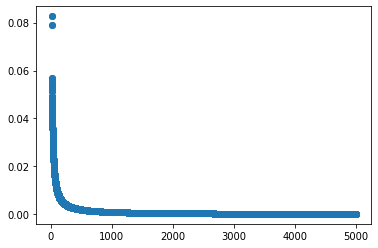

In [15]:
x= [* centrality.values()]
y=[]
for v in x:
    if v > 0.0002:
        y.append(v)

plt.scatter([1/v for v in y], y)
plt.show()

In [44]:
import pandas as pd
cols=[ 'linkId','betweeness']
rows = []

In [45]:
for g in G.edges(data=True):
    if (g[0],g[1]) in centrality.keys():
        if ('linkId' in g[2].keys()):
            rows.append({'linkId':g[2]['linkId'],'betweeness': format(centrality[(g[0],g[1])], '.9f') })

In [46]:
df = pd.DataFrame(rows, columns=cols)
df.to_csv('link2betweeness.csv',index=False)